Most probable speed vₘₚ   = 1.29×10⁴ m/s
Mean speed vₘₑₐₙ         = 1.45×10⁴ m/s
RMS speed vᵣₘₛ           = 1.57×10⁴ m/s
Variance of speed                 = 3.75×10⁷ (m/s)²
Std dev of speed σᵥ  = 6.12×10³ m/s


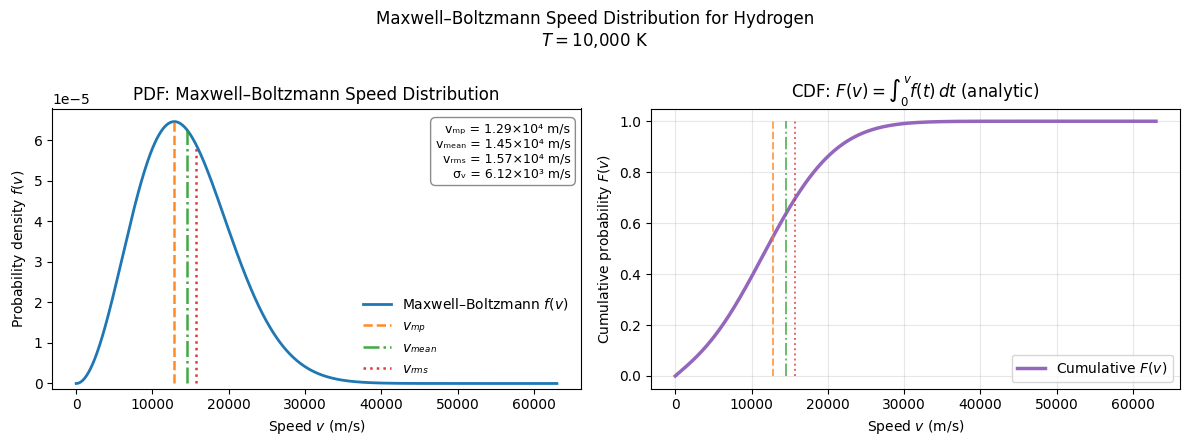

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf  # <-- change here

# ----- constants -----
k_B = 1.380649e-23
T = 1.0e4
m_H = 1.67e-27

def f_MB(v):
    prefactor = (m_H / (2 * np.pi * k_B * T)) ** 1.5
    return 4 * np.pi * prefactor * v**2 * np.exp(-m_H * v**2 / (2 * k_B * T))

# analytic CDF
a_MB = np.sqrt(2 * k_B * T / m_H)

def F_MB(v):
    x = v / a_MB
    return erf(x) - np.sqrt(2 / np.pi) * x * np.exp(-x**2)

# speeds
v_mp   = np.sqrt(2 * k_B * T / m_H)
v_mean = np.sqrt(8 * k_B * T / (np.pi * m_H))
v_rms  = np.sqrt(3 * k_B * T / m_H)

mean_v2 = v_rms**2
var_v   = mean_v2 - v_mean**2
std_v   = np.sqrt(var_v)

_sup_map = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
def sci_plain(x, digits=2):
    if x == 0:
        return f"{0:.{digits}f}"
    expo = int(np.floor(np.log10(abs(x))))
    mant = x / 10**expo
    exp_str = str(expo).translate(_sup_map)
    return f"{mant:.{digits}f}×10{exp_str}"

v_mp_label    = "vₘₚ"
v_mean_label  = "vₘₑₐₙ"
v_rms_label   = "vᵣₘₛ"
sigma_v_label = "σᵥ"

print(f"Most probable speed {v_mp_label}   = {sci_plain(v_mp)} m/s")
print(f"Mean speed {v_mean_label}         = {sci_plain(v_mean)} m/s")
print(f"RMS speed {v_rms_label}           = {sci_plain(v_rms)} m/s")
print(f"Variance of speed                 = {sci_plain(var_v)} (m/s)²")
print(f"Std dev of speed {sigma_v_label}  = {sci_plain(std_v)} m/s")

v_vals = np.linspace(0, 4 * v_rms, 2000)
f_vals = f_MB(v_vals)
F_vals = F_MB(v_vals)  # now works: erf is vectorized

fig, (ax_pdf, ax_cdf) = plt.subplots(1, 2, figsize=(12, 4.5))

# PDF
ax_pdf.plot(v_vals, f_vals, color="C0", lw=2, label="Maxwell–Boltzmann $f(v)$")
ax_pdf.vlines(v_mp,   0, f_MB(v_mp),   color="C1", lw=1.8, ls="--", alpha=0.9,
              label=rf"${v_mp_label}$")
ax_pdf.vlines(v_mean, 0, f_MB(v_mean), color="C2", lw=1.8, ls="-.", alpha=0.9,
              label=rf"${v_mean_label}$")
ax_pdf.vlines(v_rms,  0, f_MB(v_rms),  color="C3", lw=1.8, ls=":",  alpha=0.9,
              label=rf"${v_rms_label}$")

ymin = -0.02 * f_vals.max()
ymax = 1.05 * f_vals.max()
ax_pdf.set_ylim(ymin, ymax)

info_text = (
    f"{v_mp_label} = {sci_plain(v_mp)} m/s\n"
    f"{v_mean_label} = {sci_plain(v_mean)} m/s\n"
    f"{v_rms_label} = {sci_plain(v_rms)} m/s\n"
    f"{sigma_v_label} = {sci_plain(std_v)} m/s"
)
ax_pdf.text(
    0.98, 0.95, info_text,
    transform=ax_pdf.transAxes, ha="right", va="top",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.4",
              facecolor="white", edgecolor="gray", alpha=0.9),
)
ax_pdf.set_xlabel("Speed $v$ (m/s)")
ax_pdf.set_ylabel(r"Probability density $f(v)$")
ax_pdf.set_title("PDF: Maxwell–Boltzmann Speed Distribution")
ax_pdf.legend(loc="lower right", frameon=False)

# CDF
ax_cdf.plot(v_vals, F_vals, color="C4", lw=2.5, label="Cumulative $F(v)$")
ax_cdf.vlines([v_mp, v_mean, v_rms], 0, 1,
              colors=["C1", "C2", "C3"],
              lw=1.4, linestyles=["--", "-.", ":"], alpha=0.7)
ax_cdf.set_xlabel("Speed $v$ (m/s)")
ax_cdf.set_ylabel("Cumulative probability $F(v)$")
ax_cdf.set_title(r"CDF: $F(v) = \int_0^v f(t)\,dt$ (analytic)")
ax_cdf.grid(True, alpha=0.3)
ax_cdf.legend(loc="lower right")

fig.suptitle(
    "Maxwell–Boltzmann Speed Distribution for Hydrogen\n"
    r"$T = 10{,}000\ \mathrm{K}$",
    fontsize=12, y=0.98
)
fig.tight_layout()
plt.show()
